## Contents
<ol>
    <li>Importing Libraries</li>
<li> Dataset</li>
<li>Analyzing distribution of target variable</li>
<li>Dealing with missing values</li>
<li>Analyzing distribution of Quantitative features</li>
<li>Analyzing relationship between qualitative features and target variable</li>
<li>Correlation Matrix</li>
<li>Encoding Categorical Variables</li>
<li>Implementing Feature Engineering</li>
<li>Applying Machine Learning Models</li>
<li>Model stacking</li>
<li>Ensemble Model and converting results to csv file</li></ol>
    

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


In [2]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

In [3]:
# Loading the dataset
test = pd.read_csv(r"C:\Users\admin\Desktop\house-prices-advanced-regression-techniques\test.csv")
train = pd.read_csv(r"C:\Users\admin\Desktop\house-prices-advanced-regression-techniques\train.csv")

In [4]:
# Exploring the training dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
test.columns



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train.shape

(1460, 81)

In [9]:
test.shape

(1459, 80)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Analyzing distribution of target variable i.e. Sale Price


 mu = 180921.196 and sigma = 79415.292



Text(0.5, 1.0, 'SalePrice Distribution')

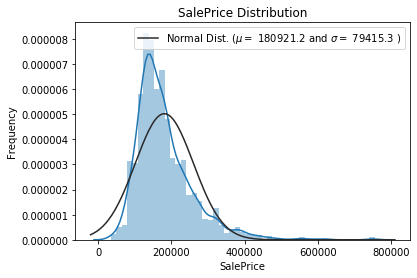

In [11]:
sns.distplot(train['SalePrice'] , fit=norm);

# Getting the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.3f} and sigma = {:.3f}\n'.format(mu, sigma))

# Plotting the distribution
plt.legend(['Normal Dist. ($\mu=$ {:.1f} and $\sigma=$ {:.1f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')


**Skewness** is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero.
Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right. By skewed left, we mean that the left tail is long relative to the right tail. Similarly, skewed right means that the right tail is long relative to the left tail.

**Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.


In [12]:
### Skewness & Kurtosis
print("Skewness before applying log transformation = " + str(train['SalePrice'].skew()))
print("Kurtosis before applying log transformation = " + str(train['SalePrice'].kurt()))

Skewness before applying log transformation = 1.8828757597682129
Kurtosis before applying log transformation = 6.536281860064529


### Applying Log transformation to improve skewness and kurtosis

**Log Transformation **: It helps to fix the skewness proble and brings back the distribution to normal. Log transformation helps to model performance, visualization and also might help to meet the assumptions of statistical tests (for eg. error normality in OLS)


 mu = 12.024 and sigma = 0.399



Text(0.5, 1.0, 'SalePrice Distribution')

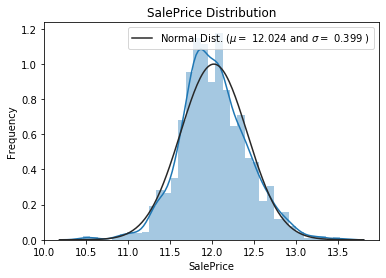

In [13]:
#We will use the np fuction log1p which will apply log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Getting the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.3f} and sigma = {:.3f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal Dist. ($\mu=$ {:.3f} and $\sigma=$ {:.3f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

In [14]:
print("Skewness after after applying  log transformation = " + str(train['SalePrice'].skew()))
print("Kurtosis after after applying log transformation = " + str(train['SalePrice'].kurt()))

Skewness after after applying  log transformation = 0.12134661989685333
Kurtosis after after applying log transformation = 0.809519155707878


## Dealing with Missing values

In [15]:
#Save the 'Id' column
train_Id = train['Id']
test_Id = test['Id']

#Now dropping the  'Id' column since it's useless for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
print("Shape of training data after eliminating Id column : {}".format(train.shape))
print("Shape of test data after eliminating Id column : {}".format(test.shape))


Shape of training data after eliminating Id column : (1460, 80)
Shape of test data after eliminating Id column : (1459, 79)


Combining the training & test data. Eliminating the ID column and Sale Price column before merging. I also eliminated the outliers present in the sales price as before putting the saleprice in ytrain variable making sure  that it is transformed and free from outliers.

In [16]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
#Combining train and test data while dropping the Sale Price
comb_data= pd.concat((train, test)).reset_index(drop=True)
comb_data.drop(['SalePrice'], axis=1 , inplace = True)
print("Size of combined data is : {}".format(comb_data.shape))

Size of combined data is : (2915, 79)


C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Filling features which contain more than 10 % data with None values

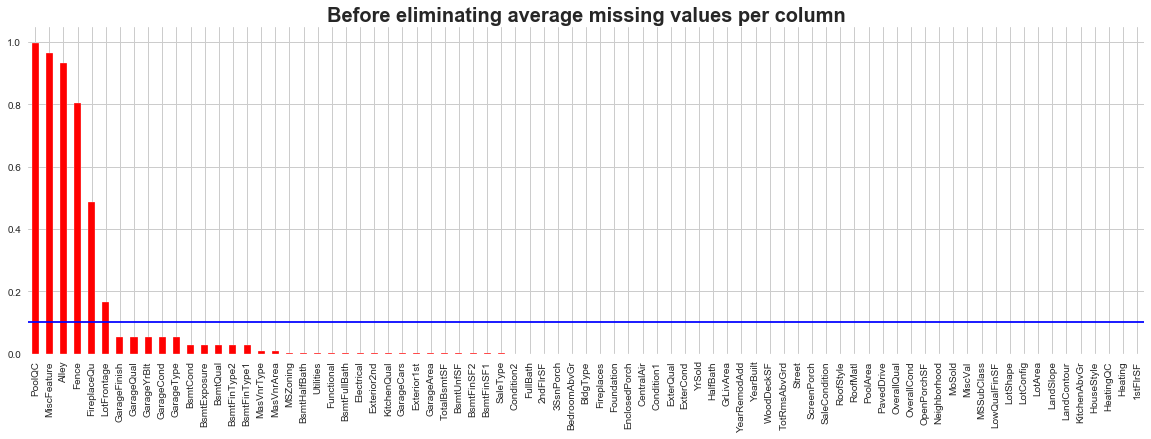

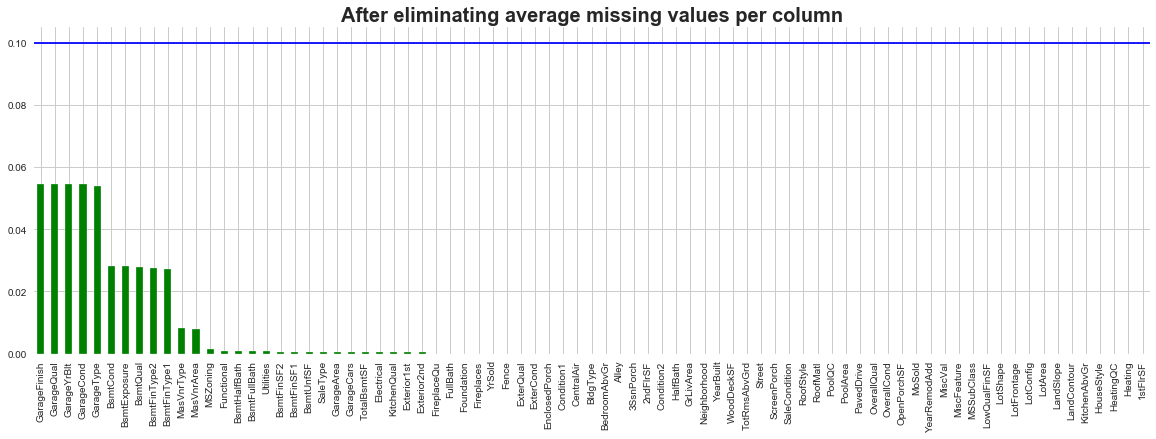

In [17]:
plt.style.use('seaborn')
sns.set_style('whitegrid')

plt.subplots(0,0, figsize=(20,6))

comb_data.isnull().mean().sort_values(ascending=False).plot.bar(color='red')
plt.axhline(y=0.1, color = 'b', linestyle='-')
plt.title('Before eliminating average missing values per column', fontsize=20, weight ='bold')
plt.show()

comb_data["PoolQC"] = comb_data["PoolQC"].fillna("None")
comb_data["MiscFeature"] = comb_data["MiscFeature"].fillna("None")
comb_data["Alley"] = comb_data["Alley"].fillna("None")
comb_data["FireplaceQu"] = comb_data["FireplaceQu"].fillna("None")
comb_data["Fence"] = comb_data["Fence"].fillna("None")

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
comb_data["LotFrontage"] = comb_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

plt.subplots(0,0, figsize =(20,6))
comb_data.isnull().mean().sort_values(ascending=False).plot.bar(color='green')
plt.axhline(y=0.1, color='b', linestyle='-')
plt.title('After eliminating average missing values per column', fontsize=20, weight='bold')
plt.show()


                                                                                     
                                                                            

In [18]:
comb_data_na = (comb_data.isnull().sum()/ len(comb_data)) * 100
comb_data_na = comb_data_na.drop(comb_data_na[comb_data_na == 0].index).sort_values(ascending=False)[:30]
miss_data = pd.DataFrame({"Ratio of missing values": comb_data_na})
miss_data.head(25)

,Ratio of missing values
GarageYrBlt,5.454545
GarageQual,5.454545
GarageFinish,5.454545
GarageCond,5.454545
GarageType,5.385935
BsmtCond,2.813036
BsmtExposure,2.813036
BsmtQual,2.778731
BsmtFinType2,2.744425
BsmtFinType1,2.710120


In [19]:
NAcat = comb_data.select_dtypes(include='object')
NAquant = comb_data.select_dtypes(exclude = 'object')
print("There are :", NAcat.shape[1],"categorical features with missing values")
print("There are :", NAquant.shape[1],"quantitative features with missing values")

There are : 43 categorical features with missing values
There are : 36 quantitative features with missing values


Filling the columns either with 0 or None depending on the values. Some houses doesn't have garages so I have filled it with 0, meta features like ' GarageQual', 'GarageCond are filled with None. This can be done in many different ways. Here I am using this approach and focus is to completely remove the NaN values from the dataset.

In [20]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    comb_data[col] = comb_data[col].fillna('None')

In [21]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    comb_data[col] = comb_data[col].fillna(0)

In [22]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    comb_data[col] = comb_data[col].fillna(0)

In [23]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    comb_data[col] = comb_data[col].fillna('None')
comb_data["MasVnrType"] = comb_data["MasVnrType"].fillna("None")
comb_data["MasVnrArea"] = comb_data["MasVnrArea"].fillna(0)
comb_data['MSZoning'] = comb_data['MSZoning'].fillna(comb_data['MSZoning'].mode()[0])
comb_data = comb_data.drop(['Utilities'], axis=1)
comb_data["Functional"] = comb_data["Functional"].fillna("Typ")
comb_data['Electrical'] = comb_data['Electrical'].fillna(comb_data['Electrical'].mode()[0])
comb_data['KitchenQual'] = comb_data['KitchenQual'].fillna(comb_data['KitchenQual'].mode()[0])
comb_data['Exterior1st'] = comb_data['Exterior1st'].fillna(comb_data['Exterior1st'].mode()[0])
comb_data['Exterior2nd'] = comb_data['Exterior2nd'].fillna(comb_data['Exterior2nd'].mode()[0])
comb_data['SaleType'] = comb_data['SaleType'].fillna(comb_data['SaleType'].mode()[0])
comb_data['MSSubClass'] = comb_data['MSSubClass'].fillna("None")

In [24]:
comb_data_na = (comb_data.isnull().sum()/ len(comb_data)) * 100
comb_data_na = comb_data_na.drop(comb_data_na[comb_data_na == 0].index).sort_values(ascending=False)[:30]
miss_data = pd.DataFrame({"Ratio of missing values": comb_data_na})
miss_data.head(25)

,Ratio of missing values


No missing value found. Data cleaning done successfully.

## Analyzing distribution of quantitative features

In [25]:

quant = train[['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold','SalePrice']]
quant.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856,854,0,3,706,0,1,0,150,0,...,7,0,0,8,856,0,2003,2003,2008,12.247699
1,1262,0,0,3,978,0,0,1,284,0,...,6,0,0,6,1262,298,1976,1976,2007,12.109016
2,920,866,0,3,486,0,1,0,434,0,...,7,0,0,6,920,0,2001,2002,2008,12.317171
3,961,756,0,3,216,0,1,0,540,272,...,7,0,0,7,756,0,1915,1970,2006,11.849405
4,1145,1053,0,4,655,0,1,0,490,0,...,8,0,0,9,1145,192,2000,2000,2008,12.429220


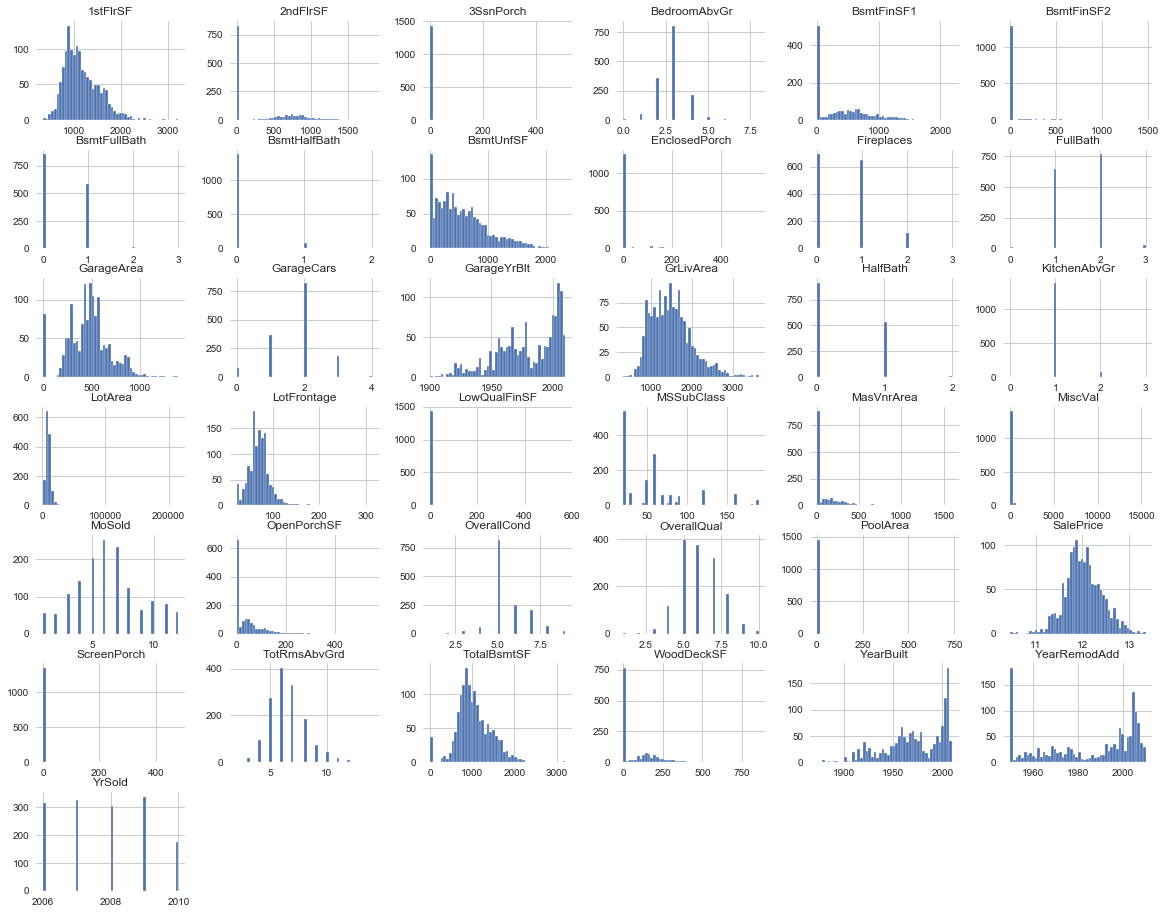

In [26]:
### Plotting the features
quant.hist(figsize = (20,16), bins=50, xlabelsize=10, ylabelsize=10);

Columns such as 1stFlrSF, GrLivArea, LotFrontage, TotalBSMTSF share similar distribution to SalePrice

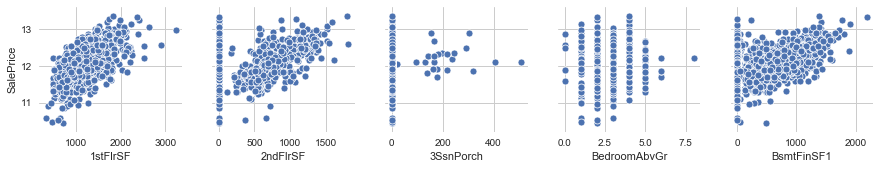

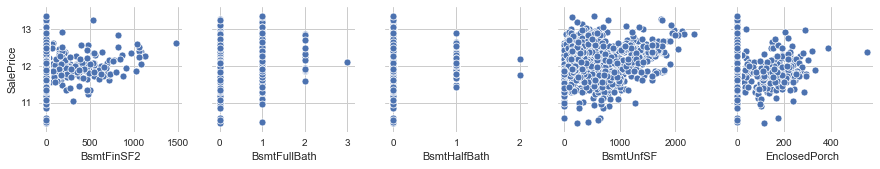

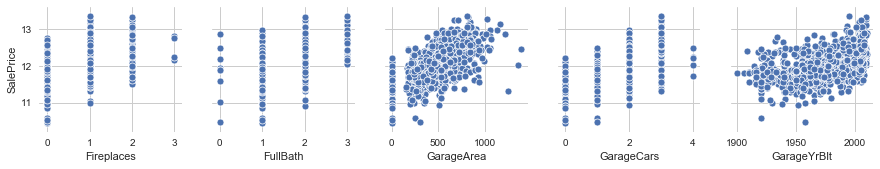

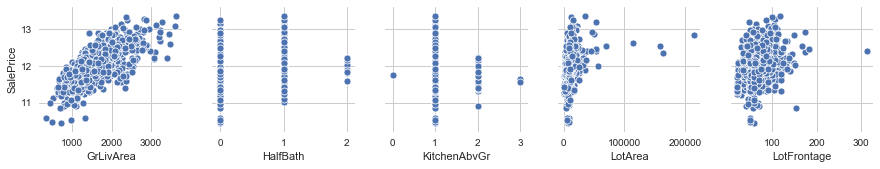

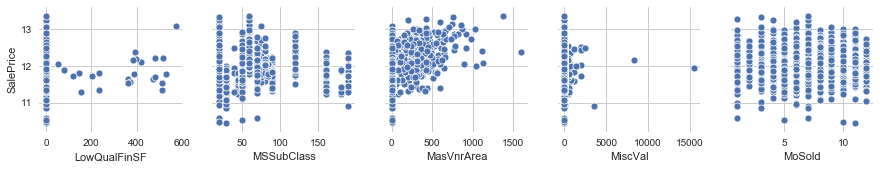

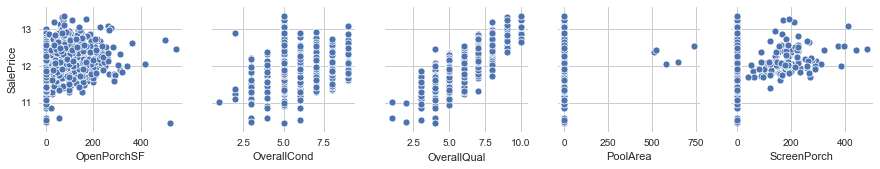

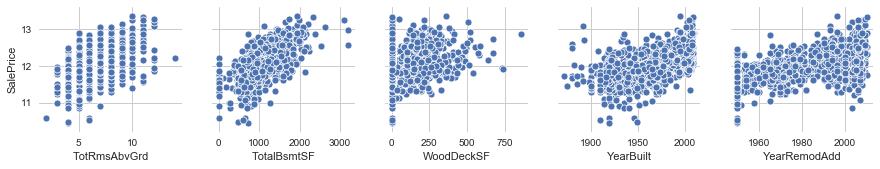

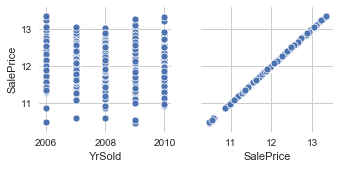

In [27]:
for i in range(0, len(quant.columns), 5):
    sns.pairplot(data=quant,
                x_vars=quant.columns[i:i+5],
                y_vars=['SalePrice'])

We can clearly identify some relationships. Most of them seems to have a linear relationship with the SalePrice and if we look closely at the data we can see that a lot of data points are located on x = 0 which may indicate the absence of such feature in the house.

## Analyzing relationship between qualitative features and target feature.

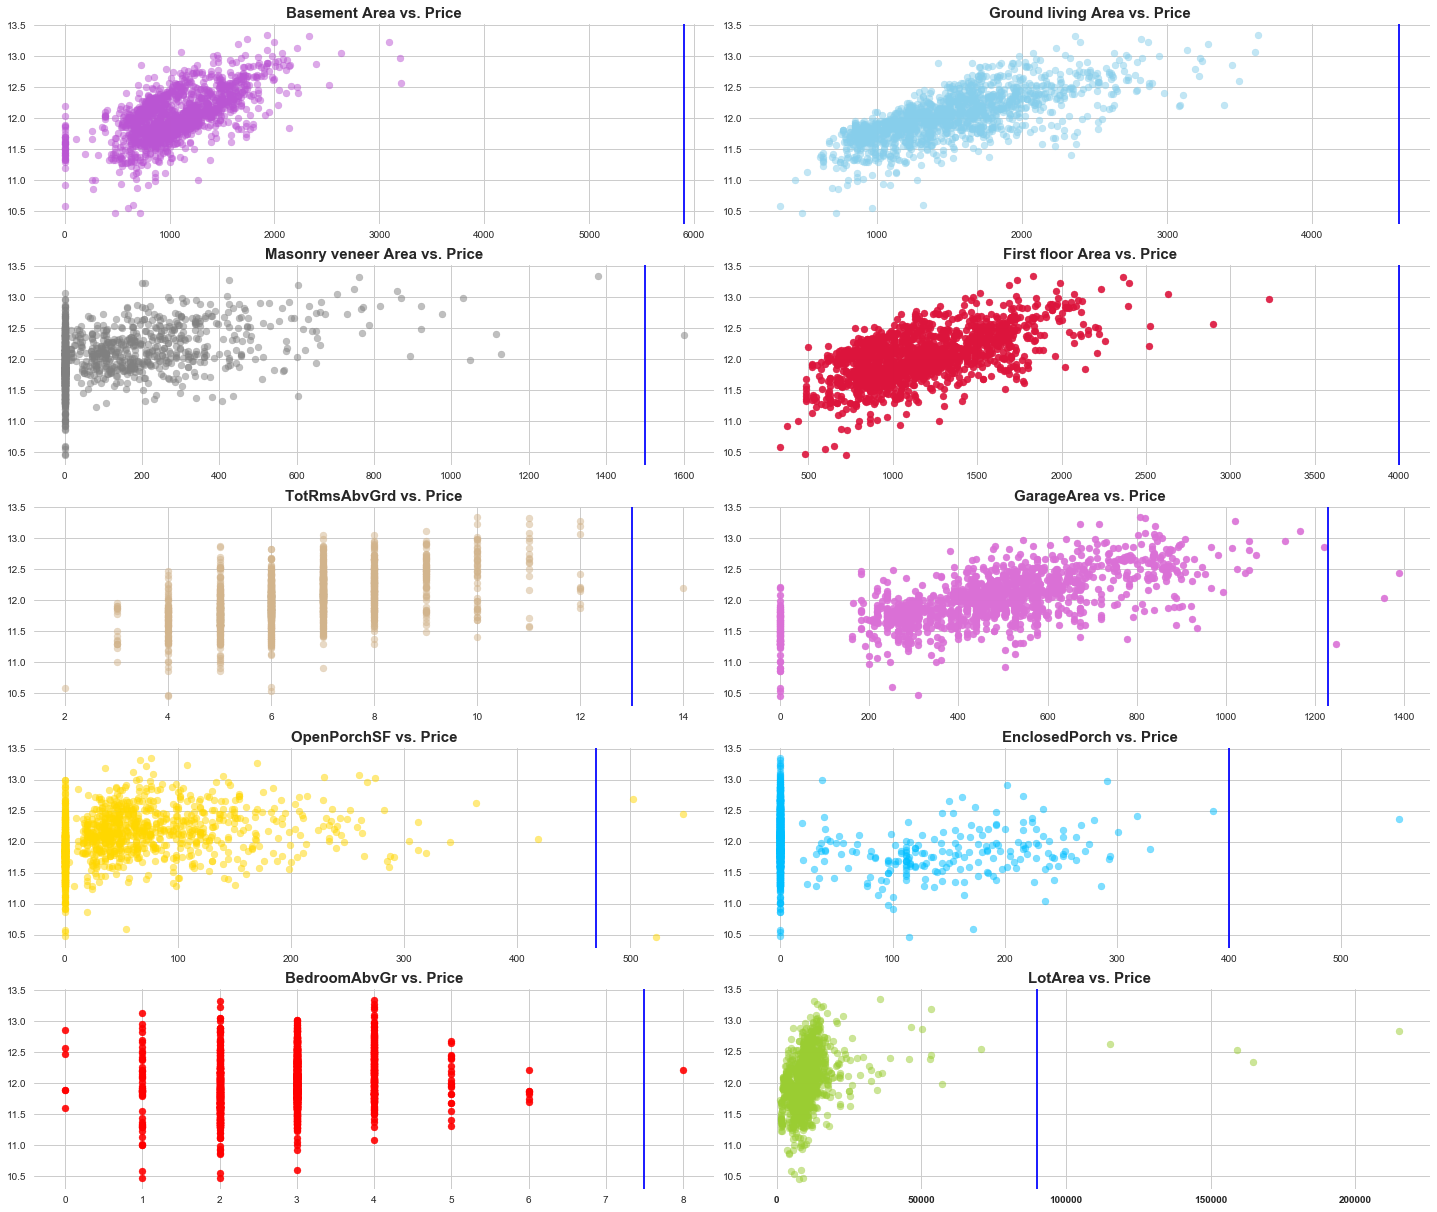

In [28]:
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot2grid((6,2),(0,0))
plt.scatter(x=train['TotalBsmtSF'], y=train['SalePrice'], color=('mediumorchid'), alpha=0.5)
plt.axvline(x=5900, color='b', linestyle='-')
plt.title('Basement Area vs. Price', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((6,2),(0,1))
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'], color=('skyblue'),alpha=0.5)
plt.axvline(x=4600, color='b', linestyle='-')
plt.title('Ground living Area vs. Price', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((6,2),(1,0))
plt.scatter(x=train['MasVnrArea'], y=train['SalePrice'], color=('gray'),alpha=0.5)
plt.axvline(x=1500, color='b', linestyle='-')
plt.title('Masonry veneer Area vs. Price', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((6,2),(1,1))
plt.scatter(x=train['1stFlrSF'], y=train['SalePrice'], color=('crimson'),alpha=0.9)
plt.axvline(x=4000, color='b', linestyle='-')
plt.title('First floor Area vs. Price', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((6,2),(2,0))
plt.scatter(x=train['TotRmsAbvGrd'], y=train['SalePrice'], color=('tan'),alpha=0.5)
plt.axvline(x=13, color='b', linestyle='-')
plt.title('TotRmsAbvGrd vs. Price', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((6,2),(2,1))
plt.scatter(x=train['GarageArea'], y=train['SalePrice'], color=('orchid'),alpha=0.9)
plt.axvline(x=1230, color='b', linestyle='-')
plt.title('GarageArea vs. Price', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((6,2),(3,0))
plt.scatter(x=train['OpenPorchSF'], y=train['SalePrice'], color=('gold'),alpha=0.5)
plt.axvline(x=470, color='b', linestyle='-')
plt.title('OpenPorchSF vs. Price', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((6,2),(3,1))
plt.scatter(x=train['EnclosedPorch'], y=train['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=400, color='b', linestyle='-')
plt.title('EnclosedPorch vs. Price', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((6,2),(4,0))
plt.scatter(x=train['BedroomAbvGr'], y=train['SalePrice'], color=('red'),alpha=0.9)
plt.axvline(x=7.5, color='b', linestyle='-')
plt.tight_layout(0.85)
plt.title('BedroomAbvGr vs. Price', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((6,2),(4,1))
plt.scatter(x=train['LotArea'], y=train['SalePrice'], color=('yellowgreen'),alpha=0.5)
plt.axvline(x=90000, color='b', linestyle='-')
plt.title('LotArea vs. Price', fontsize=15, weight='bold' )
plt.xticks(weight='bold')
plt.show()

## Correlation Matrix

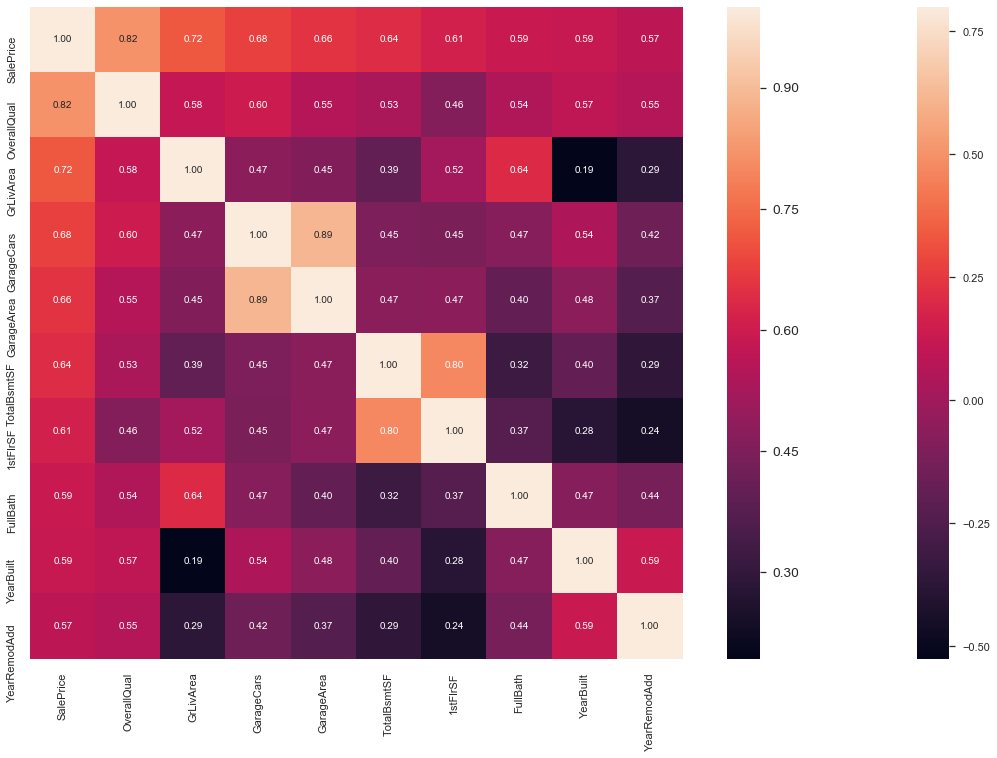

In [52]:
sns.set(style="whitegrid")
corr_matrix = train.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corr_matrix, vmax=.8, square=True)

#saleprice correlation matrix
k = 10 # Nos. of variables
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [30]:
Cor=corr_matrix['SalePrice'].sort_values(ascending=False).head(10).to_frame()
cm = sns.light_palette("seagreen", as_cmap=True)

corr_nos = Cor.style.background_gradient(cmap=cm)
corr_nos

,SalePrice
SalePrice,1
OverallQual,0.81924
GrLivArea,0.718844
GarageCars,0.680408
GarageArea,0.655212
TotalBsmtSF,0.641553
1stFlrSF,0.613742
FullBath,0.590919
YearBuilt,0.588977
YearRemodAdd,0.568986


Looking for null values in the training dataset. Once done, we can proceed towards treating categorical and numerical variables in the dataset.

In [31]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1451,0.996566
MiscFeature,1402,0.962912
Alley,1365,0.937500
Fence,1176,0.807692
FireplaceQu,690,0.473901
LotFrontage,259,0.177885
GarageType,81,0.055632
GarageCond,81,0.055632
GarageFinish,81,0.055632
GarageQual,81,0.055632


In statistics it is very important to understand different data types and learn to convert data into a format which the ML model could understand. There are two main types of data i.e.**Numerical(Quantitative)** and **Categorical(Qualitative)**.

In numerical we have two sub-data types i.e. Discrete and Continuous data

 **Discrete:** Fixed number of integer values. eg. number of cars, pets in house etc.

**Continuous:** It can have infinite number of values. eg. Height of a person, temperature of a room etc.

In categorical we have two sub-data types i.e. Nominal and Ordinal data

**Nominal:** We can categorize it and order is not important. eg. Gender(Male or Female), Car model (Nissan or Honda)

**Ordinal:** Here order is important. eg. Surveys ( Poor, Satisfactory, Average , Good,  Excellent)

Machine Learning models can only handle numerical values so we have to encode the categorical variables. 
There are various approaches to encode categorical variables such as :

1) **Label Encoding** -  Here, each category is labeled as ordered integers. Suitable for categorical nominal data

2) **One Hot Encoding** - Here, we transform each categories into individual binary features.Suitable for categorical nominal data

3)**Ordinal Encoding** - We manually assign labels for each value.Suitable for categorical ordinal data.


For this project we are using Label Encoding to encode the categorical variables.



## Encoding Categorical Variables

In [32]:
### Applying Label Encoding to categorical variables 
from sklearn.preprocessing import LabelEncoder
cat_cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for i in cat_cols:
    label = LabelEncoder()
    label.fit(list(comb_data[i].values))
    comb_data[i] = label.transform(list(comb_data[i].values))
    
# Checking shape of the dataframe
comb_data.shape



(2915, 78)

## Implementing Feature Engineering
Here I am adding all floor areas to calculate total area. There are various approaches within feature engineering and it can ultimately produce great results.


In [33]:
comb_data['CombinedSF'] = comb_data['TotalBsmtSF'] + comb_data['1stFlrSF'] + comb_data['2ndFlrSF']

In [34]:
comb_data = pd.get_dummies(comb_data)
comb_data.shape

(2915, 234)

Now split the data set into train and test, which is now ready for applying it to the machine learning models.

In [35]:
house_train = comb_data[:ntrain]
house_test = comb_data[ntrain:]

## Applying Machine Laerning Models

In [36]:
### Importing Machine Learning Libraries
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoLarsIC, Lasso, ElasticNet, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
import lightgbm as lgb
from sklearn.base import TransformerMixin, clone, BaseEstimator, RegressorMixin

In [37]:
### Creating function for checking validation
## No. of folds
n_fold = 5

def rmsle_cross_val(model):
    kf = KFold(n_fold, shuffle=True, random_state =42).get_n_splits(house_train.values)
    rmse=np.sqrt(-cross_val_score(model, house_train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
    return(rmse)

Initiating the different ML models. Selection criteria for efficient model is RMSE error. Model with the lowest RMSE score will be considered. Lasso and Ridge  models wil penalize and prevent the problem of multicollinearity. Lasso performed better as it eliminates the some features from the prediction. Elastic Net was also tuned to a Lasso close model and it gave a low RMSE. Others are applied accordingly.

In [38]:
#### Initiating the Models
Elastic_Net = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio= 0.9, random_state=3))
Lso= make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
G_boost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.005, max_depth=4, max_features='sqrt', min_samples_leaf=15,min_samples_split=5, loss='huber',random_state=5)
Ker_rid= KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
lgb_reg= lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.05, n_estimators=720, max_bin=55, bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.2319, feature_fraction_seed=9, bagging_seed=9, min_data_in_leaf=6, min_sum_hessian_in_leaf=11)
xgb_reg= xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817,n_estimators=2200, reg_alpha=0.4640, reg_lambda=0.8571,subsample=0.5213, silent=1, random_state=7, nthread= -1)

In [39]:
#### Calculating score of each model
Elnet_score = rmsle_cross_val(Elastic_Net)
Lasso_score = rmsle_cross_val(Lso)
gboost_score = rmsle_cross_val(G_boost)
kerrid_score = rmsle_cross_val(Ker_rid)
lgb_score = rmsle_cross_val(lgb_reg)
xgb_Score = rmsle_cross_val(xgb_reg)

C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.42052e-19): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.36282e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.8657e-19): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.2514e-19): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.86345e-19): r

In [40]:
#### Displaying Scores for each models
print("Elastic Net : Mean is {:.3f} and std. dev. is {:.3f}".format(Elnet_score.mean(), Elnet_score.std()))
print("Lasso regression : Mean is {:.3f} and std. dev. is {:.3f}".format(Lasso_score.mean(), Lasso_score.std()))
print("Gradient Boosting : Mean is {:.3f} and std. dev. is {:.3f}".format(gboost_score.mean(), gboost_score.std()))
print("Kernel Ridge : Mean is {:.3f} and std. dev. is {:.3f}".format(kerrid_score.mean(), kerrid_score.std()))
print("LGBM Regression : Mean is {:.3f} and std. dev. is {:.3f}".format(lgb_score.mean(), lgb_score.std()))
print("XGB Regression : Mean is {:.3f} and std. dev. is {:.3f}".format(xgb_Score.mean(), xgb_Score.std()))

Elastic Net : Mean is 0.113 and std. dev. is 0.007
Lasso regression : Mean is 0.113 and std. dev. is 0.007
Gradient Boosting : Mean is 0.114 and std. dev. is 0.007
Kernel Ridge : Mean is 0.755 and std. dev. is 0.261
LGBM Regression : Mean is 0.115 and std. dev. is 0.005
XGB Regression : Mean is 0.116 and std. dev. is 0.006


## Model Stacking 
### Here we are averaging the base model and building a new class to extend scikit-learn with our model and would also be able to reuse the code.

In [41]:
### Mean of models

class MeanofModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,models):
        self.models = models
        
    # Here we will define the duplicate copy of the original models for fitting the data
    def fit(self, X, y):
        self.models_ = [clone(i) for i in self.models]
            
        #Training the duplicate models
        for model in self.models_:
            model.fit(X,y)
                
        return self
        
    # We will conduct predictions for the duplicate models and take their mean
    def predict(self, X):
        pr = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(pr, axis=1)

In [42]:
## Score of mean of models
### Here, we are taking mean of the following models : Elastic Net, Gradient Boosting, Kernel Ridge and Lasso. We can add any number of models in it. 

In [43]:
mean_models = MeanofModels(models = (Elastic_Net, G_boost, Ker_rid, Lso))
score = rmsle_cross_val(mean_models)
print("Score of the averaged models : Mean is {:.3f} and std. dev. is {:.3f}".format(score.mean(), score.std()))


C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.42052e-19): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.36282e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.8657e-19): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.2514e-19): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.86345e-19): r

Score of the averaged models : Mean is 0.221 and std. dev. is 0.059


Here we can see that even the simplest stacking approach enhances the score . This motivates us to go further and explore a less simple stacking approch.

Less simple Stacking : Adding a Meta-model. In this approach, we will add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model.

Procedure for the training part can be described as follows:

1) Split the total training set into two disjoint sets (here train and .holdout )

2) Train several base models on the first part (train)

3) Test these base models on the second part (holdout)

4) Use the predictions from 3) known as  out-of-folds predictions as the inputs, and the correct responses (target variable) as the outputs to train a higher level learner called meta-model.

5) The first three steps are done iteratively . If we take for eg. a 5-fold stacking , we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration, we train every base model on 4 folds and predict on the remaining fold (holdout fold).
So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as new feature to train our meta-model in the step 4.

6) For the prediction part , We will take mean of  the predictions of all base models on the test data and use them as meta-features on which, the final prediction is done with the meta-model.

We can stack and apply any combination of almost all the models and pick the combination which gives the lowest RMSE using this technique.

In [44]:
class StackMeanofModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,base_m, meta_m, n_folds=5):
        self.base_m = base_m
        self.meta_m = meta_m
        self.n_folds = n_folds
        
    #Again ,we will fit the data on duplicate models
    def fit(self, X, y):
        self.base_m_ = [list() for i in self.base_m]
        self.meta_m_ = clone(self.meta_m)
        kfold = KFold(n_splits = self.n_folds, shuffle =True, random_state =156)
            
    ### Now, we will train the duplicated models & then will create predictions out of fold which are required for trainin the meta model
        outoffold_pred = np.zeros((X.shape[0], len(self.base_m)))
        for i, model in enumerate(self.base_m):
            for train_index, holdout_index in kfold.split(X,y):
                instance = clone(model)
                self.base_m_[i].append(instance)
                instance.fit(X[train_index],y[train_index])
                y_pred = instance.predict(X[holdout_index])
                outoffold_pred[holdout_index,i] = y_pred
                
    ### We will train the replica meta model using out of fold predictions as new feature
        self.meta_m_.fit(outoffold_pred, y)
        return self
            
    ### We will run the base models on test data, generate predcitions and use the mean predictions as meta features for the final prediction which is done by meta-model
    def predict(self, X):
        meta_features = np.column_stack([np.column_stack([model.predict(X) for model in base_m]).mean(axis=1)
        for base_m in self.base_m_])
        return self.meta_m_.predict(meta_features)

**Score of Stacked Meaned models:**

For making the two approaches comparable (by using the same number of models) , we  will just take mean of Elastic Net, Gradient Boost, Kernel ridge and then we add lasso as meta-model.

In [45]:
stacked_meaned_models = StackMeanofModels(base_m = (Elastic_Net, G_boost, Ker_rid),
                                                 meta_m = Lso)

score = rmsle_cross_val(stacked_meaned_models)
print("Stacked averaged models score: Mean is {:.3f} and std.dev. is{:.3f}".format(score.mean(), score.std()))

C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.49742e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.51907e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.81727e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.57004e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.50605e-18):

Stacked averaged models score: Mean is 0.109 and std.dev. is0.006


In [46]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [47]:
stacked_meaned_models.fit(house_train.values, y_train)
stacked_train_pred = stacked_meaned_models.predict(house_train.values)
stacked_pred = np.expm1(stacked_meaned_models.predict(house_test.values))
print(rmse(y_train, stacked_train_pred))

C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.32859e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.71872e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.55363e-19): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.14896e-19): result may not be accurate.
  overwrite_a=False)
C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.45586e-19):

0.09033615058277764


In [48]:
xgb_reg.fit(house_train, y_train)
xgb_train_pred = xgb_reg.predict(house_train)
xgb_pred = np.expm1(xgb_reg.predict(house_test))
print(rmse(y_train, xgb_train_pred))

0.07905103022679955


In [49]:
lgb_reg.fit(house_train, y_train)
lgb_train_pred = lgb_reg.predict(house_train)
lgb_pred = np.expm1(lgb_reg.predict(house_test.values))
print(rmse(y_train, lgb_train_pred))

0.07192917502046427


## Ensemble Model and converting results to csv file
#### Here, we again got a wonderful score by adding a meta learner.Now, we will take the weighted sum of the predictions of the three models to form a ensmeble model and submit the ensemble predictions in a submit.csv file.

In [50]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [51]:
###Converting results to .csv file
submit = pd.DataFrame()
submit['Id'] = test_Id
submit['SalePrice'] = ensemble
submit.to_csv('submission.csv',index=False)
print("Successfully converted results to .csv file")

Successfully converted results to .csv file
